In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Max Sum Reward for subset 1: 5574
Max Sum Reward for subset 2: 2599
Max Sum Reward for subset 3: 0
Max Sum Reward for subset 4: 5173
Max Sum Reward for subset 5: 2679
Max Sum Reward for subset 6: 5600
Max Sum Reward for subset 7: 0
Max Sum Reward for subset 8: 2533
Max Sum Reward for subset 9: 2930
Max Sum Reward for subset 10: 5371

Average Maximum Sum Reward across all subsets: 3245.9


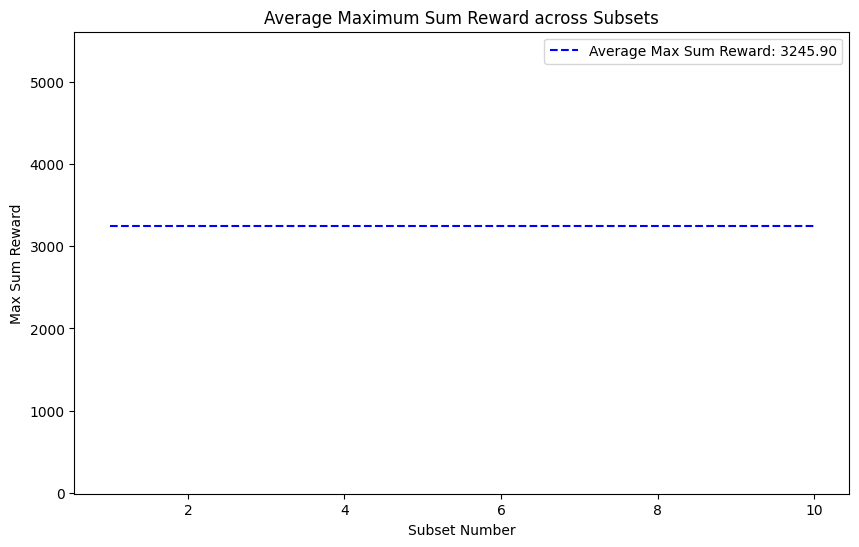

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize a list to store the maximum sum rewards for each subset
max_sum_rewards = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for logistic regression
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predict and calculate the maximum sum reward for this subset
    y_pred_full = log_reg.predict(X).reshape(subset_size, subset_size)
    predicted_reward_matrix = np.where(y_pred_full == 1, R, 0)
    max_sum_reward = np.sum(predicted_reward_matrix)

    # Append the max sum reward for this subset to the list
    max_sum_rewards.append(max_sum_reward)

    # Print the max sum reward for this subset
    print(f"Max Sum Reward for subset {i+1}: {max_sum_reward}")

# Calculate the average maximum sum reward across all subsets
avg_max_sum_reward = np.mean(max_sum_rewards)

# Print the average maximum sum reward
print("\nAverage Maximum Sum Reward across all subsets:", avg_max_sum_reward)

# Plotting the Average Max Sum Reward as a single point on the y-axis
plt.figure(figsize=(10, 6))
plt.plot([1, num_subsets], [avg_max_sum_reward, avg_max_sum_reward], color="blue", linestyle="--", label=f"Average Max Sum Reward: {avg_max_sum_reward:.2f}")
plt.ylim(min(max_sum_rewards) - 10, max(max_sum_rewards) + 10)
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Average Maximum Sum Reward across Subsets")
plt.legend()
plt.show()


Max Sum Reward for subset 1: 3062
Max Sum Reward for subset 2: 5471
Max Sum Reward for subset 3: 2663
Max Sum Reward for subset 4: 5374
Max Sum Reward for subset 5: 2644
Max Sum Reward for subset 6: 3207
Max Sum Reward for subset 7: 2824
Max Sum Reward for subset 8: 0
Max Sum Reward for subset 9: 0
Max Sum Reward for subset 10: 5082

Average Maximum Sum Reward across all subsets: 3032.7


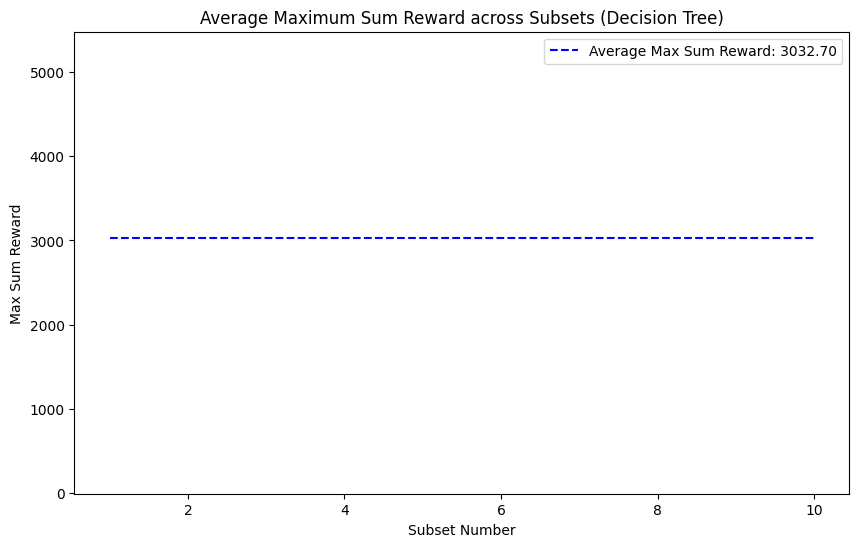

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize a list to store the maximum sum rewards for each subset
max_sum_rewards = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for decision tree classification
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)

    # Predict and calculate the maximum sum reward for this subset
    y_pred_full = tree_clf.predict(X).reshape(subset_size, subset_size)
    predicted_reward_matrix = np.where(y_pred_full == 1, R, 0)
    max_sum_reward = np.sum(predicted_reward_matrix)

    # Append the max sum reward for this subset to the list
    max_sum_rewards.append(max_sum_reward)

    # Print the max sum reward for this subset
    print(f"Max Sum Reward for subset {i+1}: {max_sum_reward}")

# Calculate the average maximum sum reward across all subsets
avg_max_sum_reward = np.mean(max_sum_rewards)

# Print the average maximum sum reward
print("\nAverage Maximum Sum Reward across all subsets:", avg_max_sum_reward)

# Plotting the Average Max Sum Reward as a single point on the y-axis
plt.figure(figsize=(10, 6))
plt.plot([1, num_subsets], [avg_max_sum_reward, avg_max_sum_reward], color="blue", linestyle="--", label=f"Average Max Sum Reward: {avg_max_sum_reward:.2f}")
plt.ylim(min(max_sum_rewards) - 10, max(max_sum_rewards) + 10)
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Average Maximum Sum Reward across Subsets (Decision Tree)")
plt.legend()
plt.show()


# Decision Tree

Max Sum Reward for subset 1: 0
Max Sum Reward for subset 2: 2848
Max Sum Reward for subset 3: 0
Max Sum Reward for subset 4: 0
Max Sum Reward for subset 5: 0
Max Sum Reward for subset 6: 4840
Max Sum Reward for subset 7: 2461
Max Sum Reward for subset 8: 5372
Max Sum Reward for subset 9: 5281
Max Sum Reward for subset 10: 0

Average Maximum Sum Reward across all subsets: 2080.2


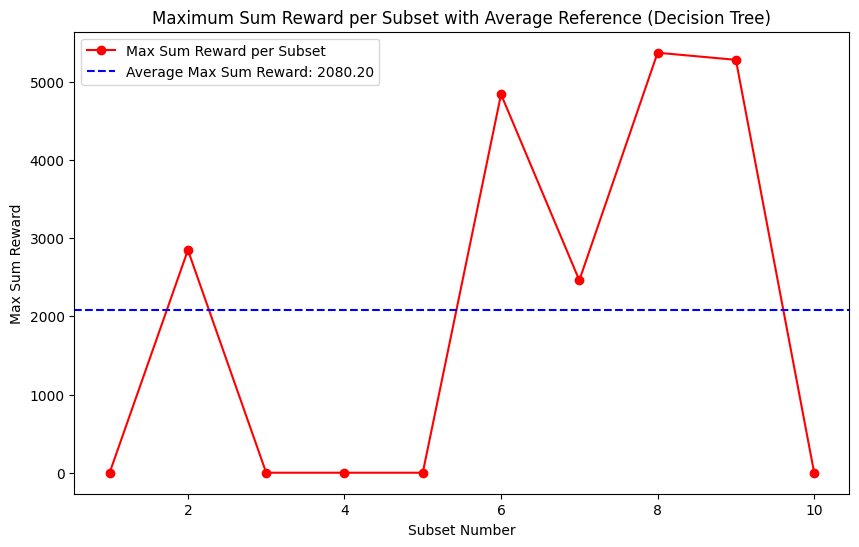

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize a list to store the maximum sum rewards for each subset
max_sum_rewards = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for decision tree classification
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)

    # Predict and calculate the maximum sum reward for this subset
    y_pred_full = tree_clf.predict(X).reshape(subset_size, subset_size)
    predicted_reward_matrix = np.where(y_pred_full == 1, R, 0)
    max_sum_reward = np.sum(predicted_reward_matrix)

    # Append the max sum reward for this subset to the list
    max_sum_rewards.append(max_sum_reward)

    # Print the max sum reward for this subset
    print(f"Max Sum Reward for subset {i+1}: {max_sum_reward}")

# Calculate the average maximum sum reward across all subsets
avg_max_sum_reward = np.mean(max_sum_rewards)

# Print the average maximum sum reward
print("\nAverage Maximum Sum Reward across all subsets:", avg_max_sum_reward)

# Plotting the max sum reward for each subset with the average as a reference line
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_subsets + 1), max_sum_rewards, marker="o", color="red", label="Max Sum Reward per Subset")
plt.axhline(y=avg_max_sum_reward, color="blue", linestyle="--", label=f"Average Max Sum Reward: {avg_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward per Subset with Average Reference (Decision Tree)")
plt.legend()
plt.show()


# KNN

Max Sum Reward for subset 1: 2370
Max Sum Reward for subset 2: 2498
Max Sum Reward for subset 3: 4849
Max Sum Reward for subset 4: 2307
Max Sum Reward for subset 5: 5122
Max Sum Reward for subset 6: 2238
Max Sum Reward for subset 7: 2245
Max Sum Reward for subset 8: 0
Max Sum Reward for subset 9: 2403
Max Sum Reward for subset 10: 2745

Average Maximum Sum Reward across all subsets: 2677.7


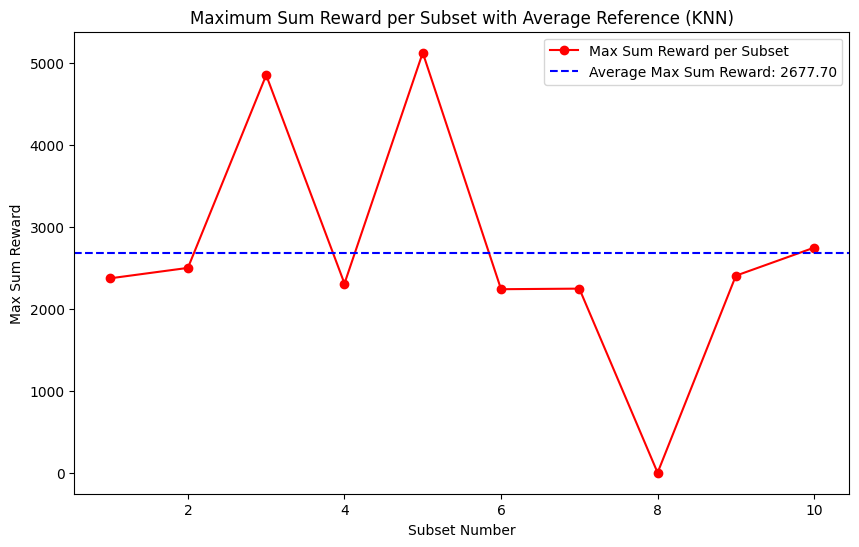

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize a list to store the maximum sum rewards for each subset
max_sum_rewards = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for classification
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the KNN model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Set number of neighbors (you can experiment with this)
    knn_clf.fit(X_train, y_train)

    # Predict and calculate the maximum sum reward for this subset
    y_pred_full = knn_clf.predict(X).reshape(subset_size, subset_size)
    predicted_reward_matrix = np.where(y_pred_full == 1, R, 0)
    max_sum_reward = np.sum(predicted_reward_matrix)

    # Append the max sum reward for this subset to the list
    max_sum_rewards.append(max_sum_reward)

    # Print the max sum reward for this subset
    print(f"Max Sum Reward for subset {i+1}: {max_sum_reward}")

# Calculate the average maximum sum reward across all subsets
avg_max_sum_reward = np.mean(max_sum_rewards)

# Print the average maximum sum reward
print("\nAverage Maximum Sum Reward across all subsets:", avg_max_sum_reward)

# Plotting the max sum reward for each subset with the average as a reference line
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_subsets + 1), max_sum_rewards, marker="o", color="red", label="Max Sum Reward per Subset")
plt.axhline(y=avg_max_sum_reward, color="blue", linestyle="--", label=f"Average Max Sum Reward: {avg_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward per Subset with Average Reference (KNN)")
plt.legend()
plt.show()


Max Sum Reward for subset 1: 0
Max Sum Reward for subset 2: 0
Max Sum Reward for subset 3: 5216
Max Sum Reward for subset 4: 0
Max Sum Reward for subset 5: 2831
Max Sum Reward for subset 6: 2776
Max Sum Reward for subset 7: 0
Max Sum Reward for subset 8: 5304
Max Sum Reward for subset 9: 2969
Max Sum Reward for subset 10: 0

Average Maximum Sum Reward across all subsets: 1909.6


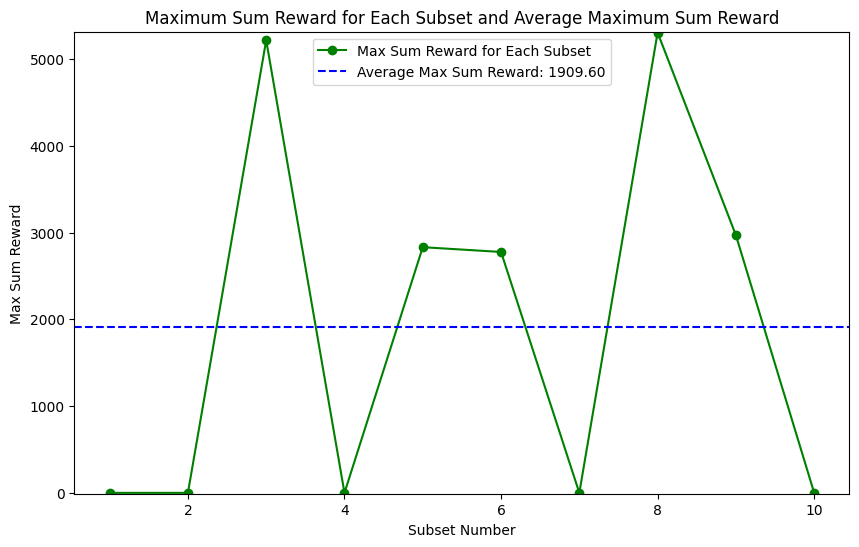

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize a list to store the maximum sum rewards and individual subset reward matrices
max_sum_rewards = []
subset_reward_matrices = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for logistic regression
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predict and calculate the maximum sum reward for this subset
    y_pred_full = log_reg.predict(X).reshape(subset_size, subset_size)
    predicted_reward_matrix = np.where(y_pred_full == 1, R, 0)
    max_sum_reward = np.sum(predicted_reward_matrix)

    # Append the max sum reward for this subset and store the subset reward matrix
    max_sum_rewards.append(max_sum_reward)
    subset_reward_matrices.append(predicted_reward_matrix)

    # Print the max sum reward for this subset
    print(f"Max Sum Reward for subset {i+1}: {max_sum_reward}")

# Calculate the average maximum sum reward across all subsets
avg_max_sum_reward = np.mean(max_sum_rewards)

# Print the average maximum sum reward
print("\nAverage Maximum Sum Reward across all subsets:", avg_max_sum_reward)

# Plotting the Average Max Sum Reward as a single point on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_subsets + 1), max_sum_rewards, marker='o', color='green', label="Max Sum Reward for Each Subset")
plt.axhline(y=avg_max_sum_reward, color="blue", linestyle="--", label=f"Average Max Sum Reward: {avg_max_sum_reward:.2f}")
plt.ylim(min(max_sum_rewards) - 10, max(max_sum_rewards) + 10)
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward for Each Subset and Average Maximum Sum Reward")
plt.legend()
plt.show()


Subset 1: Logistic Regression Max Sum Reward = 0, Decision Tree Max Sum Reward = 0
Subset 2: Logistic Regression Max Sum Reward = 5682, Decision Tree Max Sum Reward = 5682
Subset 3: Logistic Regression Max Sum Reward = 5229, Decision Tree Max Sum Reward = 5229
Subset 4: Logistic Regression Max Sum Reward = 2744, Decision Tree Max Sum Reward = 2744
Subset 5: Logistic Regression Max Sum Reward = 2913, Decision Tree Max Sum Reward = 2913
Subset 6: Logistic Regression Max Sum Reward = 2686, Decision Tree Max Sum Reward = 2686
Subset 7: Logistic Regression Max Sum Reward = 2720, Decision Tree Max Sum Reward = 2720
Subset 8: Logistic Regression Max Sum Reward = 5020, Decision Tree Max Sum Reward = 5020
Subset 9: Logistic Regression Max Sum Reward = 0, Decision Tree Max Sum Reward = 0
Subset 10: Logistic Regression Max Sum Reward = 0, Decision Tree Max Sum Reward = 0

Average Maximum Sum Reward across all subsets:
Logistic Regression: 2699.4
Decision Tree: 2699.4


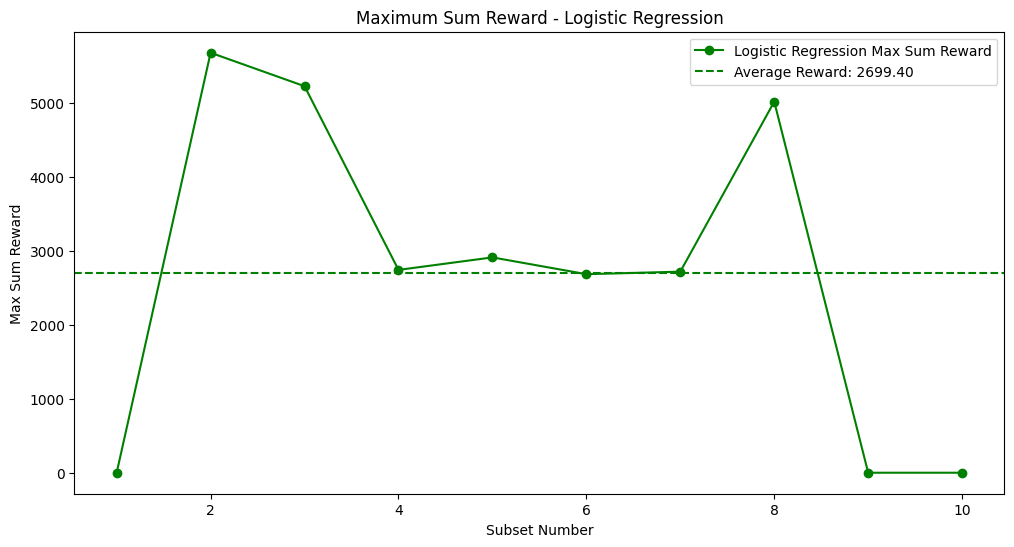

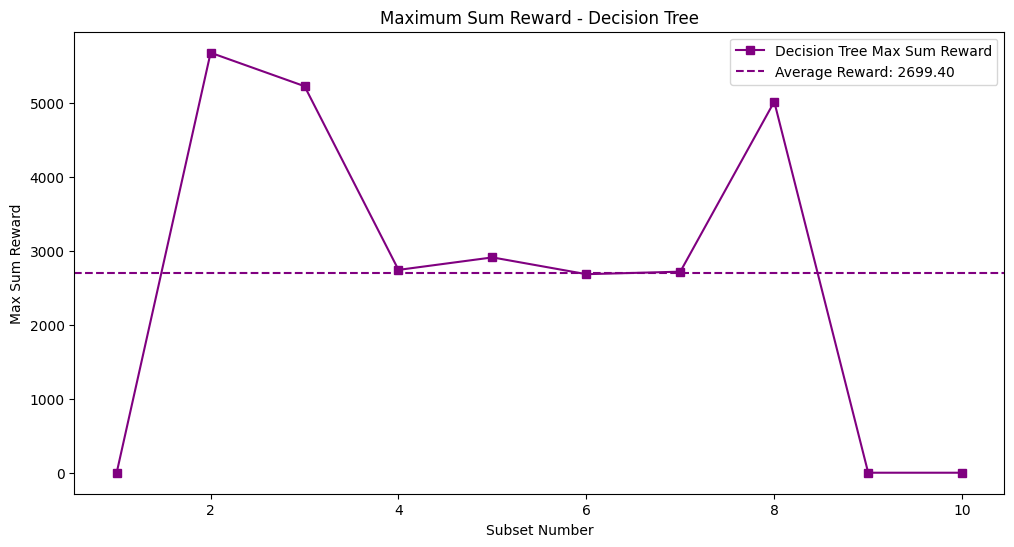

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store maximum sum rewards for each classifier
logistic_max_sum_rewards = []
decision_tree_max_sum_rewards = []
subset_reward_matrices = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_max_sum_reward = np.sum(logistic_predicted_reward_matrix)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_max_sum_reward = np.sum(tree_predicted_reward_matrix)

    # Store the max sum rewards for both models and subset reward matrices
    logistic_max_sum_rewards.append(logistic_max_sum_reward)
    decision_tree_max_sum_rewards.append(tree_max_sum_reward)
    subset_reward_matrices.append((logistic_predicted_reward_matrix, tree_predicted_reward_matrix))

    # Print the max sum reward for this subset for each model
    print(f"Subset {i+1}: Logistic Regression Max Sum Reward = {logistic_max_sum_reward}, Decision Tree Max Sum Reward = {tree_max_sum_reward}")

# Calculate the average maximum sum reward across all subsets for both models
avg_logistic_max_sum_reward = np.mean(logistic_max_sum_rewards)
avg_tree_max_sum_reward = np.mean(decision_tree_max_sum_rewards)

# Print the average maximum sum rewards for each model
print("\nAverage Maximum Sum Reward across all subsets:")
print(f"Logistic Regression: {avg_logistic_max_sum_reward}")
print(f"Decision Tree: {avg_tree_max_sum_reward}")

# Plotting the maximum sum rewards for Logistic Regression
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_subsets + 1), logistic_max_sum_rewards, marker='o', color='green', label="Logistic Regression Max Sum Reward")
plt.axhline(y=avg_logistic_max_sum_reward, color="green", linestyle="--", label=f"Average Reward: {avg_logistic_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Logistic Regression")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Decision Tree
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_subsets + 1), decision_tree_max_sum_rewards, marker='s', color='purple', label="Decision Tree Max Sum Reward")
plt.axhline(y=avg_tree_max_sum_reward, color="purple", linestyle="--", label=f"Average Reward: {avg_tree_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Decision Tree")
plt.legend()
plt.show()


# MSR 10*10

Subset 1: Logistic Regression = 2789, Decision Tree = 2789, Random Forest = 2789, kNN = 5452
Subset 2: Logistic Regression = 0, Decision Tree = 0, Random Forest = 0, kNN = 0
Subset 3: Logistic Regression = 2712, Decision Tree = 2712, Random Forest = 2712, kNN = 0
Subset 4: Logistic Regression = 5190, Decision Tree = 2159, Random Forest = 2159, kNN = 3031
Subset 5: Logistic Regression = 4865, Decision Tree = 4865, Random Forest = 4865, kNN = 2171
Subset 6: Logistic Regression = 2597, Decision Tree = 2597, Random Forest = 2597, kNN = 5088
Subset 7: Logistic Regression = 5355, Decision Tree = 5355, Random Forest = 5355, kNN = 5355
Subset 8: Logistic Regression = 0, Decision Tree = 0, Random Forest = 0, kNN = 2276
Subset 9: Logistic Regression = 2944, Decision Tree = 2944, Random Forest = 2944, kNN = 0
Subset 10: Logistic Regression = 0, Decision Tree = 0, Random Forest = 0, kNN = 2528

Average Maximum Sum Reward across all subsets:
Logistic Regression: 2645.2
Decision Tree: 2342.1
Random 

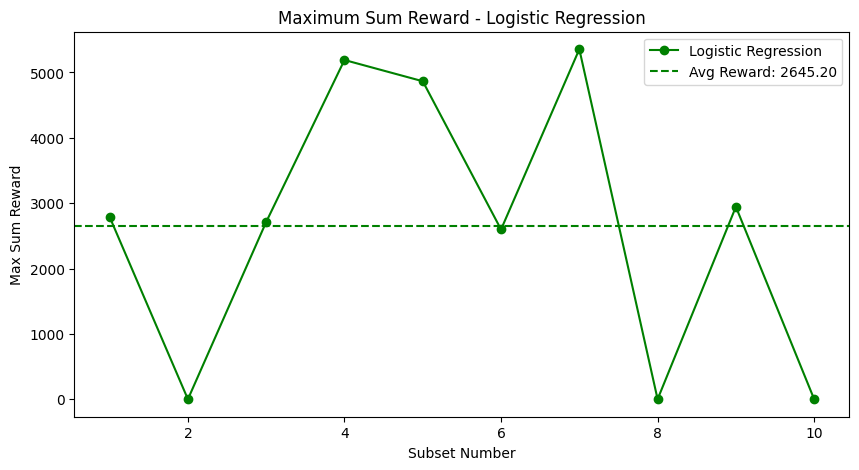

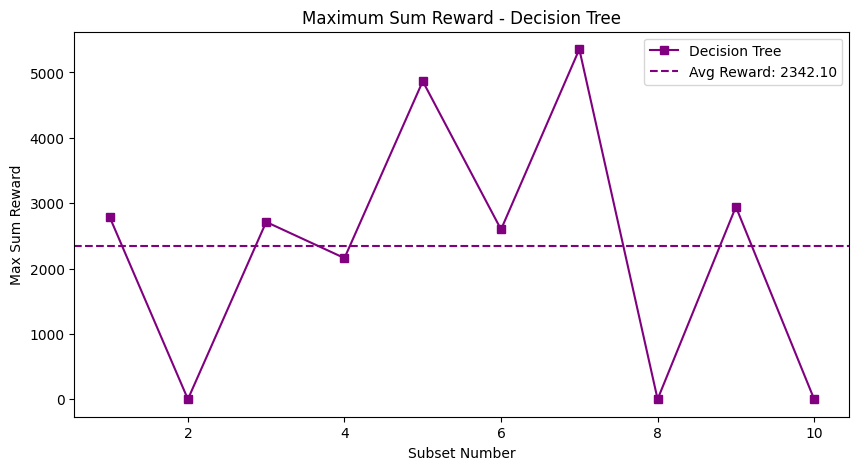

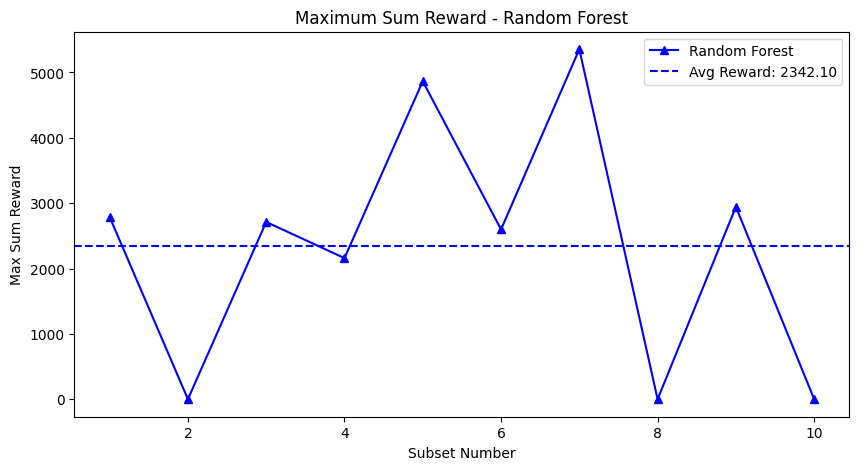

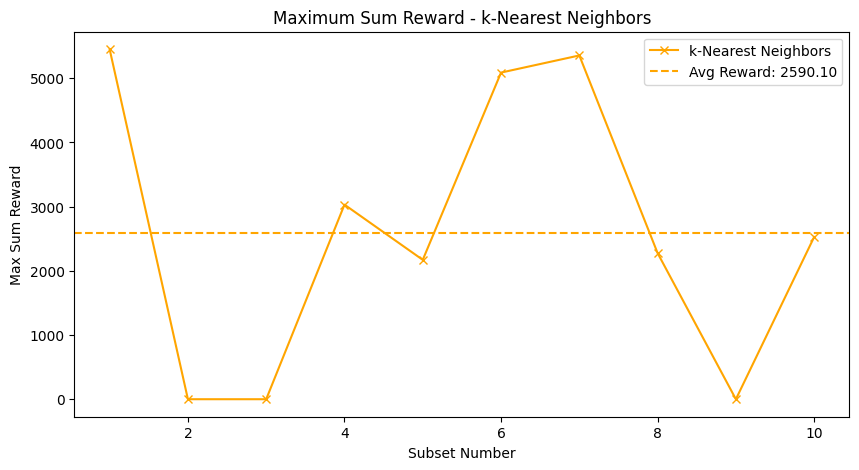

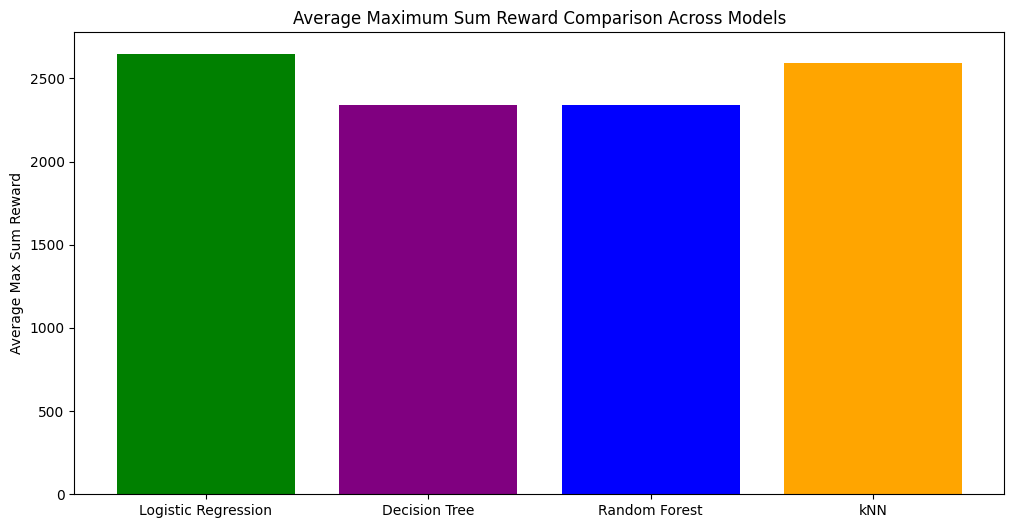

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 10
num_subsets = 10

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store maximum sum rewards for each classifier
logistic_max_sum_rewards = []
decision_tree_max_sum_rewards = []
random_forest_max_sum_rewards = []
knn_max_sum_rewards = []
subset_reward_matrices = []

# Loop to sample and evaluate 10 random 10x10 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 10x10 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 10x10 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_max_sum_reward = np.sum(logistic_predicted_reward_matrix)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_max_sum_reward = np.sum(tree_predicted_reward_matrix)

    # Random Forest model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X).reshape(subset_size, subset_size)
    rf_predicted_reward_matrix = np.where(y_pred_rf == 1, R, 0)
    rf_max_sum_reward = np.sum(rf_predicted_reward_matrix)

    # k-Nearest Neighbors model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Example k=3
    knn_clf.fit(X_train, y_train)
    y_pred_knn = knn_clf.predict(X).reshape(subset_size, subset_size)
    knn_predicted_reward_matrix = np.where(y_pred_knn == 1, R, 0)
    knn_max_sum_reward = np.sum(knn_predicted_reward_matrix)

    # Store the max sum rewards for all models and subset reward matrices
    logistic_max_sum_rewards.append(logistic_max_sum_reward)
    decision_tree_max_sum_rewards.append(tree_max_sum_reward)
    random_forest_max_sum_rewards.append(rf_max_sum_reward)
    knn_max_sum_rewards.append(knn_max_sum_reward)
    subset_reward_matrices.append((logistic_predicted_reward_matrix, tree_predicted_reward_matrix, rf_predicted_reward_matrix, knn_predicted_reward_matrix))

    # Print the max sum reward for this subset for each model
    print(f"Subset {i+1}: Logistic Regression = {logistic_max_sum_reward}, Decision Tree = {tree_max_sum_reward}, Random Forest = {rf_max_sum_reward}, kNN = {knn_max_sum_reward}")

# Calculate the average maximum sum reward across all subsets for each model
avg_logistic_max_sum_reward = np.mean(logistic_max_sum_rewards)
avg_tree_max_sum_reward = np.mean(decision_tree_max_sum_rewards)
avg_rf_max_sum_reward = np.mean(random_forest_max_sum_rewards)
avg_knn_max_sum_reward = np.mean(knn_max_sum_rewards)

# Print the average maximum sum rewards for each model
print("\nAverage Maximum Sum Reward across all subsets:")
print(f"Logistic Regression: {avg_logistic_max_sum_reward}")
print(f"Decision Tree: {avg_tree_max_sum_reward}")
print(f"Random Forest: {avg_rf_max_sum_reward}")
print(f"k-Nearest Neighbors: {avg_knn_max_sum_reward}")

# Plotting the maximum sum rewards for Logistic Regression
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), logistic_max_sum_rewards, marker='o', color='green', label="Logistic Regression")
plt.axhline(y=avg_logistic_max_sum_reward, color="green", linestyle="--", label=f"Avg Reward: {avg_logistic_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Logistic Regression")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Decision Tree
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), decision_tree_max_sum_rewards, marker='s', color='purple', label="Decision Tree")
plt.axhline(y=avg_tree_max_sum_reward, color="purple", linestyle="--", label=f"Avg Reward: {avg_tree_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Decision Tree")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), random_forest_max_sum_rewards, marker='^', color='blue', label="Random Forest")
plt.axhline(y=avg_rf_max_sum_reward, color="blue", linestyle="--", label=f"Avg Reward: {avg_rf_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Random Forest")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for k-Nearest Neighbors
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), knn_max_sum_rewards, marker='x', color='orange', label="k-Nearest Neighbors")
plt.axhline(y=avg_knn_max_sum_reward, color="orange", linestyle="--", label=f"Avg Reward: {avg_knn_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - k-Nearest Neighbors")
plt.legend()
plt.show()

# Overlay plot to compare the average maximum sum rewards of all models
plt.figure(figsize=(12, 6))
plt.bar(['Logistic Regression', 'Decision Tree', 'Random Forest', 'kNN'],
        [avg_logistic_max_sum_reward, avg_tree_max_sum_reward, avg_rf_max_sum_reward, avg_knn_max_sum_reward],
        color=['green', 'purple', 'blue', 'orange'])
plt.ylabel("Average Max Sum Reward")
plt.title("Average Maximum Sum Reward Comparison Across Models")
plt.show()


# MSR 15*15

Subset 1: Logistic Regression = 11814, Decision Tree = 11814, Random Forest = 11814, kNN = 6072
Subset 2: Logistic Regression = 4842, Decision Tree = 4842, Random Forest = 4842, kNN = 0
Subset 3: Logistic Regression = 12226, Decision Tree = 12226, Random Forest = 12226, kNN = 0
Subset 4: Logistic Regression = 4952, Decision Tree = 4952, Random Forest = 0, kNN = 4952
Subset 5: Logistic Regression = 11812, Decision Tree = 5928, Random Forest = 11812, kNN = 5928
Subset 6: Logistic Regression = 6694, Decision Tree = 6694, Random Forest = 6694, kNN = 6694
Subset 7: Logistic Regression = 6531, Decision Tree = 6531, Random Forest = 6531, kNN = 0
Subset 8: Logistic Regression = 0, Decision Tree = 0, Random Forest = 0, kNN = 5455
Subset 9: Logistic Regression = 11869, Decision Tree = 11869, Random Forest = 11869, kNN = 0
Subset 10: Logistic Regression = 0, Decision Tree = 0, Random Forest = 0, kNN = 11021
Subset 11: Logistic Regression = 6053, Decision Tree = 6053, Random Forest = 6053, kNN = 6

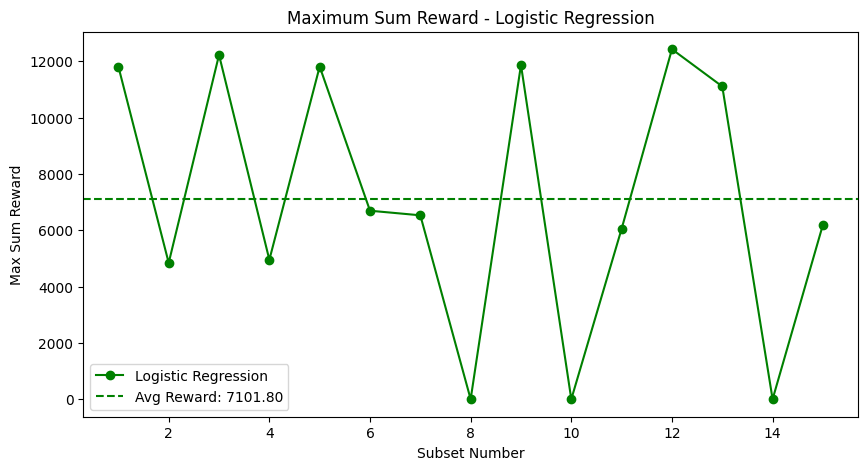

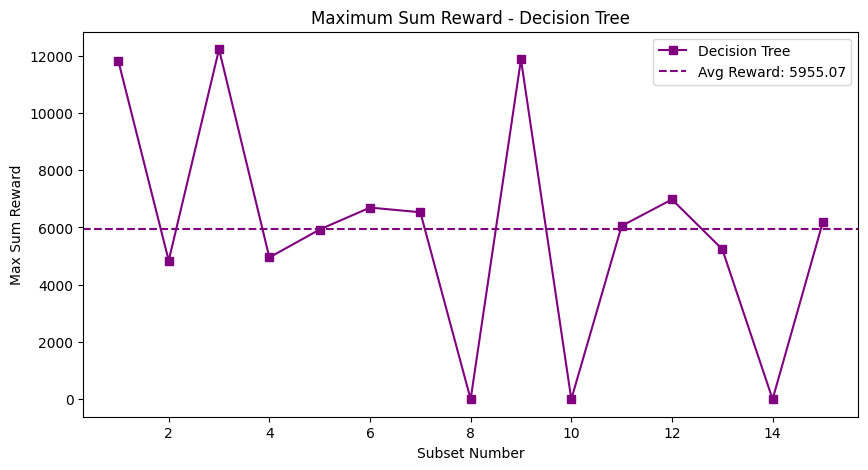

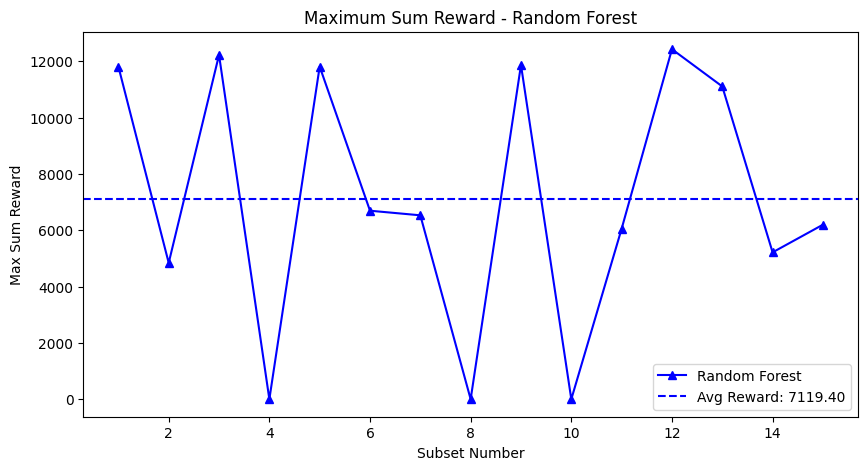

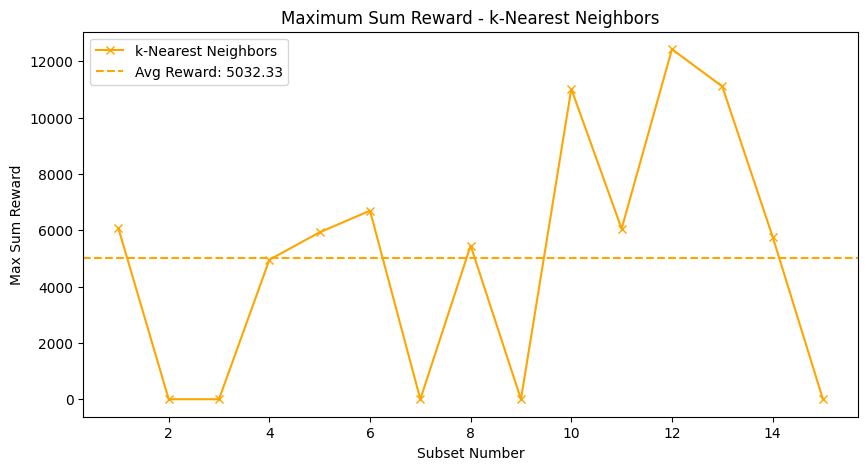

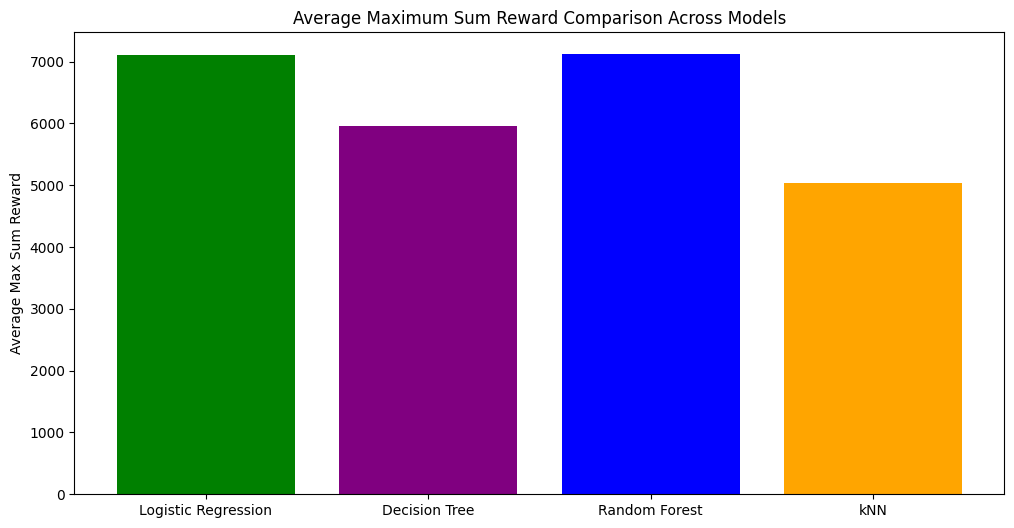

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 15  # Updated to 15x15
num_subsets = 15  # Increased to 15 subsets

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store maximum sum rewards for each classifier
logistic_max_sum_rewards = []
decision_tree_max_sum_rewards = []
random_forest_max_sum_rewards = []
knn_max_sum_rewards = []
subset_reward_matrices = []

# Loop to sample and evaluate 15 random 15x15 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 15x15 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 15x15 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_max_sum_reward = np.sum(logistic_predicted_reward_matrix)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_max_sum_reward = np.sum(tree_predicted_reward_matrix)

    # Random Forest model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X).reshape(subset_size, subset_size)
    rf_predicted_reward_matrix = np.where(y_pred_rf == 1, R, 0)
    rf_max_sum_reward = np.sum(rf_predicted_reward_matrix)

    # k-Nearest Neighbors model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Example k=3
    knn_clf.fit(X_train, y_train)
    y_pred_knn = knn_clf.predict(X).reshape(subset_size, subset_size)
    knn_predicted_reward_matrix = np.where(y_pred_knn == 1, R, 0)
    knn_max_sum_reward = np.sum(knn_predicted_reward_matrix)

    # Store the max sum rewards for all models and subset reward matrices
    logistic_max_sum_rewards.append(logistic_max_sum_reward)
    decision_tree_max_sum_rewards.append(tree_max_sum_reward)
    random_forest_max_sum_rewards.append(rf_max_sum_reward)
    knn_max_sum_rewards.append(knn_max_sum_reward)
    subset_reward_matrices.append((logistic_predicted_reward_matrix, tree_predicted_reward_matrix, rf_predicted_reward_matrix, knn_predicted_reward_matrix))

    # Print the max sum reward for this subset for each model
    print(f"Subset {i+1}: Logistic Regression = {logistic_max_sum_reward}, Decision Tree = {tree_max_sum_reward}, Random Forest = {rf_max_sum_reward}, kNN = {knn_max_sum_reward}")

# Calculate the average maximum sum reward across all subsets for each model
avg_logistic_max_sum_reward = np.mean(logistic_max_sum_rewards)
avg_tree_max_sum_reward = np.mean(decision_tree_max_sum_rewards)
avg_rf_max_sum_reward = np.mean(random_forest_max_sum_rewards)
avg_knn_max_sum_reward = np.mean(knn_max_sum_rewards)

# Print the average maximum sum rewards for each model
print("\nAverage Maximum Sum Reward across all subsets:")
print(f"Logistic Regression: {avg_logistic_max_sum_reward}")
print(f"Decision Tree: {avg_tree_max_sum_reward}")
print(f"Random Forest: {avg_rf_max_sum_reward}")
print(f"k-Nearest Neighbors: {avg_knn_max_sum_reward}")

# Plotting the maximum sum rewards for Logistic Regression
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), logistic_max_sum_rewards, marker='o', color='green', label="Logistic Regression")
plt.axhline(y=avg_logistic_max_sum_reward, color="green", linestyle="--", label=f"Avg Reward: {avg_logistic_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Logistic Regression")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Decision Tree
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), decision_tree_max_sum_rewards, marker='s', color='purple', label="Decision Tree")
plt.axhline(y=avg_tree_max_sum_reward, color="purple", linestyle="--", label=f"Avg Reward: {avg_tree_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Decision Tree")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), random_forest_max_sum_rewards, marker='^', color='blue', label="Random Forest")
plt.axhline(y=avg_rf_max_sum_reward, color="blue", linestyle="--", label=f"Avg Reward: {avg_rf_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Random Forest")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for k-Nearest Neighbors
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), knn_max_sum_rewards, marker='x', color='orange', label="k-Nearest Neighbors")
plt.axhline(y=avg_knn_max_sum_reward, color="orange", linestyle="--", label=f"Avg Reward: {avg_knn_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - k-Nearest Neighbors")
plt.legend()
plt.show()

# Overlay plot to compare the average maximum sum rewards of all models
plt.figure(figsize=(12, 6))
plt.bar(['Logistic Regression', 'Decision Tree', 'Random Forest', 'kNN'],
        [avg_logistic_max_sum_reward, avg_tree_max_sum_reward, avg_rf_max_sum_reward, avg_knn_max_sum_reward],
        color=['green', 'purple', 'blue', 'orange'])
plt.ylabel("Average Max Sum Reward")
plt.title("Average Maximum Sum Reward Comparison Across Models")
plt.show()


# MSR 20*20

Subset 1: Logistic Regression = 10338, Decision Tree = 10338, Random Forest = 10338, kNN = 10338
Subset 2: Logistic Regression = 21115, Decision Tree = 21115, Random Forest = 21115, kNN = 11593
Subset 3: Logistic Regression = 11605, Decision Tree = 11605, Random Forest = 11605, kNN = 21094
Subset 4: Logistic Regression = 10691, Decision Tree = 10691, Random Forest = 20711, kNN = 10020
Subset 5: Logistic Regression = 20334, Decision Tree = 20334, Random Forest = 20334, kNN = 0
Subset 6: Logistic Regression = 10729, Decision Tree = 10729, Random Forest = 10729, kNN = 9736
Subset 7: Logistic Regression = 21032, Decision Tree = 21032, Random Forest = 21032, kNN = 10744
Subset 8: Logistic Regression = 11175, Decision Tree = 11175, Random Forest = 11175, kNN = 8973
Subset 9: Logistic Regression = 20357, Decision Tree = 20357, Random Forest = 20357, kNN = 10729
Subset 10: Logistic Regression = 10582, Decision Tree = 10582, Random Forest = 10582, kNN = 10582
Subset 11: Logistic Regression = 21

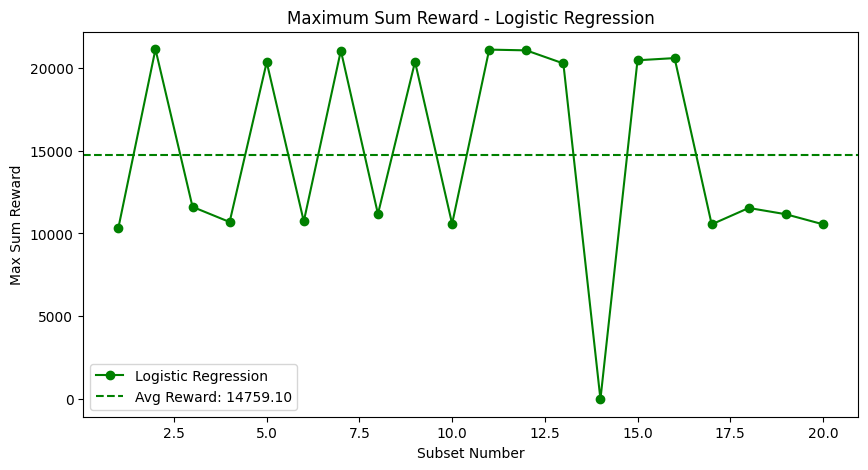

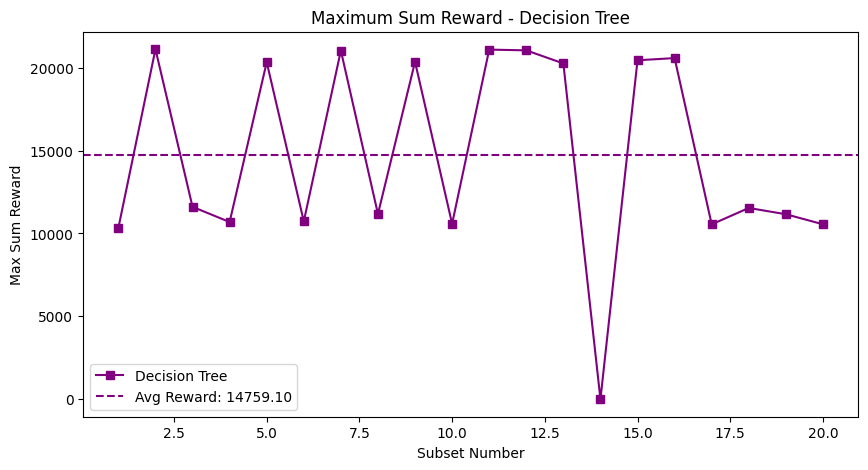

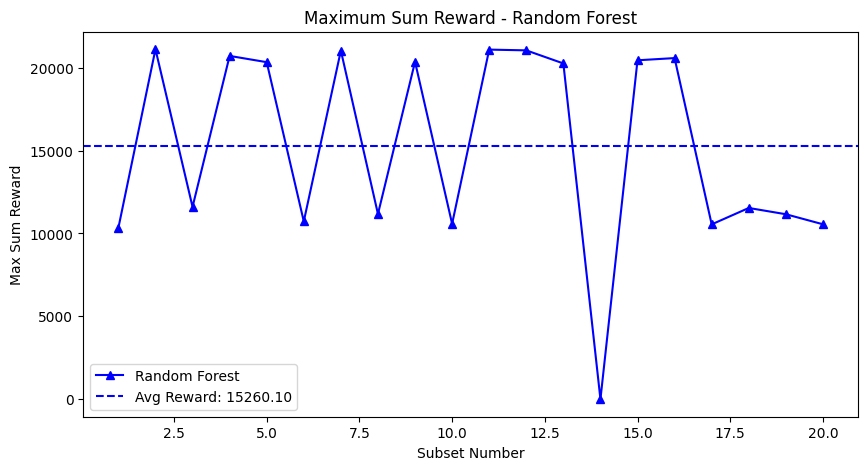

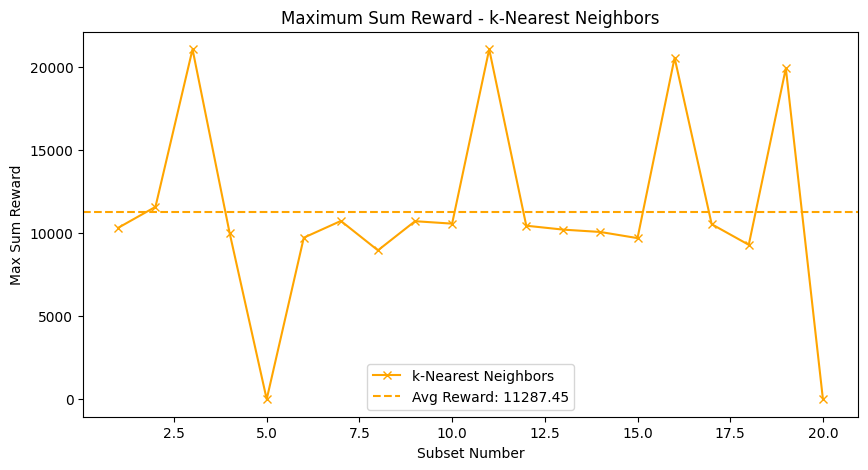

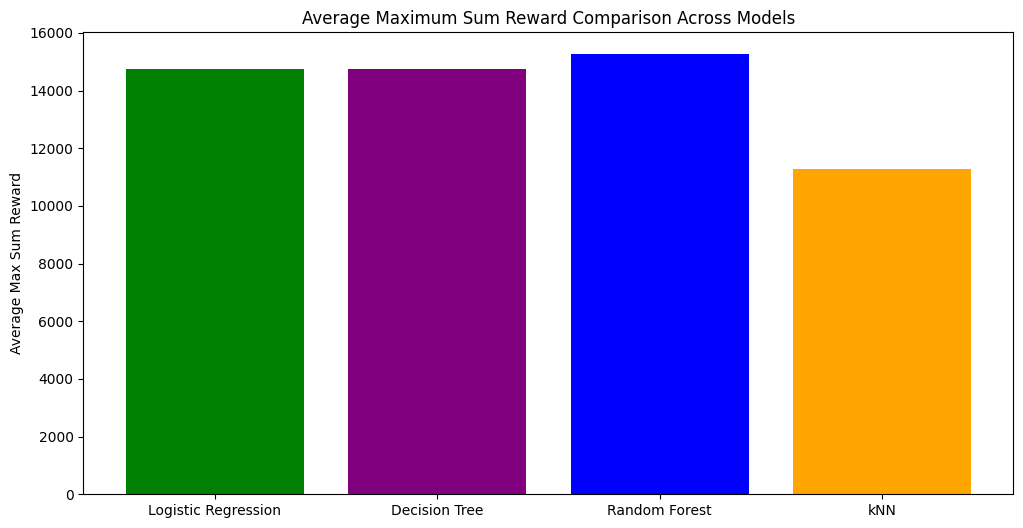

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define the subset size and number of subsets
subset_size = 20  # Updated to 20x20
num_subsets = 20  # Updated to process 20 subsets

# Load the channel matrix and reward matrix from CSV files
C_full = pd.read_csv("/content/drive/MyDrive/finalyr/channel_matrix.csv", header=None).values
R_full = pd.read_csv("/content/drive/MyDrive/finalyr/reward_matrix.csv", header=None).values

# Normalize the reward matrix to the range [0, 1]
R_normalized_full = R_full / 100.0

# Initialize lists to store maximum sum rewards for each classifier
logistic_max_sum_rewards = []
decision_tree_max_sum_rewards = []
random_forest_max_sum_rewards = []
knn_max_sum_rewards = []
subset_reward_matrices = []

# Loop to sample and evaluate 20 random 20x20 subsets
for i in range(num_subsets):
    # Randomly select the top-left corner of a 20x20 subset
    start_row = np.random.randint(0, C_full.shape[0] - subset_size)
    start_col = np.random.randint(0, C_full.shape[1] - subset_size)

    # Extract the 20x20 subset from the full matrices
    C = C_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R = R_full[start_row:start_row + subset_size, start_col:start_col + subset_size]
    R_normalized = R_normalized_full[start_row:start_row + subset_size, start_col:start_col + subset_size]

    # Flatten the matrices for model training
    C_flat = C.flatten()  # Channel values
    R_flat = R_normalized.flatten()  # Normalized reward values

    # Define binary classification target: high reward (1) vs. low reward (0)
    threshold = 0.5
    R_target = (R_flat > threshold).astype(int)  # Convert rewards to binary based on threshold

    # Prepare the feature matrix and standardize it
    X = C_flat.reshape(-1, 1)  # Channel values as single-feature input
    y = R_target  # Binary reward target
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_logistic = log_reg.predict(X).reshape(subset_size, subset_size)
    logistic_predicted_reward_matrix = np.where(y_pred_logistic == 1, R, 0)
    logistic_max_sum_reward = np.sum(logistic_predicted_reward_matrix)

    # Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred_tree = tree_clf.predict(X).reshape(subset_size, subset_size)
    tree_predicted_reward_matrix = np.where(y_pred_tree == 1, R, 0)
    tree_max_sum_reward = np.sum(tree_predicted_reward_matrix)

    # Random Forest model
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X).reshape(subset_size, subset_size)
    rf_predicted_reward_matrix = np.where(y_pred_rf == 1, R, 0)
    rf_max_sum_reward = np.sum(rf_predicted_reward_matrix)

    # k-Nearest Neighbors model
    knn_clf = KNeighborsClassifier(n_neighbors=3)  # Example k=3
    knn_clf.fit(X_train, y_train)
    y_pred_knn = knn_clf.predict(X).reshape(subset_size, subset_size)
    knn_predicted_reward_matrix = np.where(y_pred_knn == 1, R, 0)
    knn_max_sum_reward = np.sum(knn_predicted_reward_matrix)

    # Store the max sum rewards for all models and subset reward matrices
    logistic_max_sum_rewards.append(logistic_max_sum_reward)
    decision_tree_max_sum_rewards.append(tree_max_sum_reward)
    random_forest_max_sum_rewards.append(rf_max_sum_reward)
    knn_max_sum_rewards.append(knn_max_sum_reward)
    subset_reward_matrices.append((logistic_predicted_reward_matrix, tree_predicted_reward_matrix, rf_predicted_reward_matrix, knn_predicted_reward_matrix))

    # Print the max sum reward for this subset for each model
    print(f"Subset {i+1}: Logistic Regression = {logistic_max_sum_reward}, Decision Tree = {tree_max_sum_reward}, Random Forest = {rf_max_sum_reward}, kNN = {knn_max_sum_reward}")

# Calculate the average maximum sum reward across all subsets for each model
avg_logistic_max_sum_reward = np.mean(logistic_max_sum_rewards)
avg_tree_max_sum_reward = np.mean(decision_tree_max_sum_rewards)
avg_rf_max_sum_reward = np.mean(random_forest_max_sum_rewards)
avg_knn_max_sum_reward = np.mean(knn_max_sum_rewards)

# Print the average maximum sum rewards for each model
print("\nAverage Maximum Sum Reward across all subsets:")
print(f"Logistic Regression: {avg_logistic_max_sum_reward}")
print(f"Decision Tree: {avg_tree_max_sum_reward}")
print(f"Random Forest: {avg_rf_max_sum_reward}")
print(f"k-Nearest Neighbors: {avg_knn_max_sum_reward}")

# Plotting the maximum sum rewards for Logistic Regression
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), logistic_max_sum_rewards, marker='o', color='green', label="Logistic Regression")
plt.axhline(y=avg_logistic_max_sum_reward, color="green", linestyle="--", label=f"Avg Reward: {avg_logistic_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Logistic Regression")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Decision Tree
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), decision_tree_max_sum_rewards, marker='s', color='purple', label="Decision Tree")
plt.axhline(y=avg_tree_max_sum_reward, color="purple", linestyle="--", label=f"Avg Reward: {avg_tree_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Decision Tree")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), random_forest_max_sum_rewards, marker='^', color='blue', label="Random Forest")
plt.axhline(y=avg_rf_max_sum_reward, color="blue", linestyle="--", label=f"Avg Reward: {avg_rf_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - Random Forest")
plt.legend()
plt.show()

# Plotting the maximum sum rewards for k-Nearest Neighbors
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_subsets + 1), knn_max_sum_rewards, marker='x', color='orange', label="k-Nearest Neighbors")
plt.axhline(y=avg_knn_max_sum_reward, color="orange", linestyle="--", label=f"Avg Reward: {avg_knn_max_sum_reward:.2f}")
plt.xlabel("Subset Number")
plt.ylabel("Max Sum Reward")
plt.title("Maximum Sum Reward - k-Nearest Neighbors")
plt.legend()
plt.show()

# Overlay plot to compare the average maximum sum rewards of all models
plt.figure(figsize=(12, 6))
plt.bar(['Logistic Regression', 'Decision Tree', 'Random Forest', 'kNN'],
        [avg_logistic_max_sum_reward, avg_tree_max_sum_reward, avg_rf_max_sum_reward, avg_knn_max_sum_reward],
        color=['green', 'purple', 'blue', 'orange'])
plt.ylabel("Average Max Sum Reward")
plt.title("Average Maximum Sum Reward Comparison Across Models")
plt.show()
